In [1]:
from sklearn.neighbors import NearestNeighbors

In [2]:
samples = [[0,0,2],[1,0,0],[0,0,1]]
neigh = NearestNeighbors(2, 0.4)
samples

[[0, 0, 2], [1, 0, 0], [0, 0, 1]]

In [3]:
neigh.fit(samples)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=2, p=2, radius=0.4)

In [4]:
neigh.kneighbors([[0,0,1.3]],2, return_distance=False)

array([[2, 0]], dtype=int64)

In [5]:
neigh.radius_neighbors([[0,0,1.3]], 0.4, return_distance=True)

(array([array([0.3])], dtype=object),
 array([array([2], dtype=int64)], dtype=object))

In [6]:
samples = [[0.,0.,0.],[0.,.5,0.],[1.,1.,.5]]

In [7]:
neigh = NearestNeighbors(n_neighbors = 1)
neigh.fit(samples)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=1, p=2, radius=1.0)

In [8]:
neigh.kneighbors([[0.,1.,0.]])

(array([[0.5]]), array([[1]], dtype=int64))

# Nearest Neighbor Classification

In [9]:
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
import matplotlib.pylab as pl
import matplotlib as mp

In [10]:
n_neighbors = 15

iris = datasets.load_iris()
X = iris.data[:,:2]

y = iris.target

h = 0.02 #step size in the mesh

#color map
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])



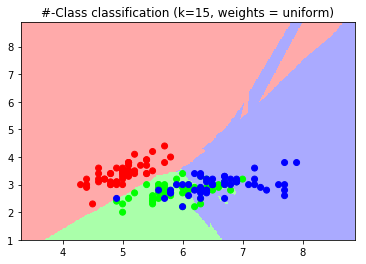

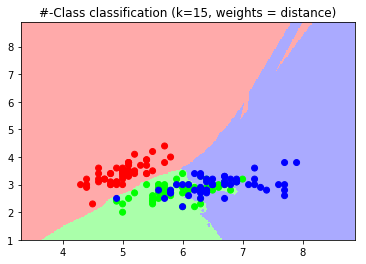

In [12]:
for weights in ['uniform','distance']:
    #create an instance of Neighbors Classifier and fir the data
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X,y)
    
    #Plot the decision boundary. For that, we will assign a color to each
    #point in the mesh [x_min, x_max]x[y_min,y_max]
    
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:,0].max()+1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    
    #Put the results into a color plot
    Z = Z.reshape(xx.shape)
    pl.figure()
    pl.pcolormesh(xx,yy,Z, cmap=cmap_light)
    
   
    
    #Plot also the training points
    pl.scatter(X[:,0], X[:,1], c=y, cmap=cmap_bold)
    pl.xlim(xx.min(), xx.max())
    pl.ylim(yy.min(), yy.max())
    pl.title('#-Class classification (k={}, weights = {})'.format(n_neighbors, weights))

# Completing faces

In [18]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.utils.validation import check_random_state

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

from IPython.core.display import Image

In [63]:
data = fetch_olivetti_faces()
targets = data.target

data = data.images.reshape((len(data.images), -1))
train = data[targets < 30]
test = data[targets >= 30] #Test on independent people

#Test on subset of people
n_faces = 5
rng = check_random_state(4)
face_ids = rng.randint(test.shape[0], size=(n_faces, ))
test = test[face_ids, :]

n_pixels = data.shape[1]
X_train = train[:, :np.ceil(0.5 * n_pixels).astype(int)] # Upper half of the face
y_train = train[:, np.floor(0.5 * n_pixels).astype(int):] # Lower half of the face
X_test = test[:, :np.ceil(0.5*n_pixels).astype(int)]
y_test = test[:, np.floor(0.5*n_pixels).astype(int):]

#Fir estimators
ESTIMATORS = { "Extra trees": ExtraTreesRegressor(n_estimators=10, max_features=32,random_state=0), "K-nn":KNeighborsRegressor(), "Linear regression": LinearRegression(), 'Ridge':RidgeCV()}



In [65]:
y_test_predict = dict()
for name,estimator in ESTIMATORS.items():
    estimator.fit(X_train, y_train)
    y_test_predict[name] = estimator.predict(X_test)
    
#Plot the complete faces
image_shape =(64,64)

n_cols = 1 + len(ESTIMATORS)
plt.figure(figsize=(16. * n_cols, 18.08 * n_faces))
plt.suptitle("Face completion with multi-output estimators", size=16)

Text(0.5,0.98,'Face completion with multi-output estimators')

<Figure size 5760x6508.8 with 0 Axes>

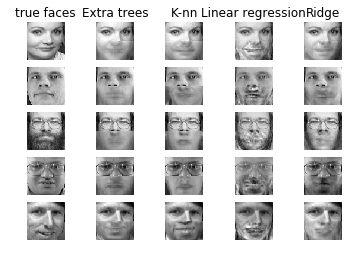

In [66]:
for i in range(n_faces):
    true_face = np.hstack((X_test[i], y_test[i]))
    
    if i:
        sub = plt.subplot(n_faces, n_cols, i*n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i* n_cols + 1, title = 'true faces')
        
    sub.axis("off")
    sub.imshow(true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation = 'nearest')
    
    for j,est in enumerate(sorted(ESTIMATORS)):
        completed_face = np.hstack((X_test[i], y_test_predict[est][i]))
        
        if i:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)
        else:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j, title=est)
            
        sub.axis("off")
        sub.imshow(completed_face.reshape(image_shape),cmap=plt.cm.gray,interpolation='nearest')